# 🧠 Student Dropout Prediction – Exploratory Data Analysis (EDA)
This notebook explores the *Predict Students’ Dropout and Academic Success* dataset from UCI.
We'll examine key patterns, correlations, and demographic/academic factors related to dropout risk.

In [9]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline


In [ ]:
# Load dataset (update path as needed)
df = pd.read_csv("data/raw/student_dropout_data.csv", sep=";")
print("Shape:", df.shape)
df.head()


Shape: (4424, 37)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Basic info and summary stats
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application_mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application_order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime_evening_attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous_qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous_qualification_grade,4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nacionality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mothers_qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Fathers_qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0


## 🎯 Target Variable Distribution

/var/folders/x5/bcc48lnd1z9byt_rz_vzszq00000gn/T/ipykernel_31954/3765331908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Status", data=df, palette="viridis")


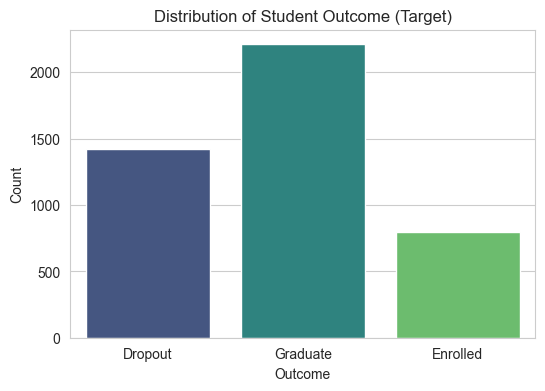

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="Status", data=df, palette="viridis")
plt.title("Distribution of Student Outcome (Target)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

## 👩‍🎓 Demographic Trends

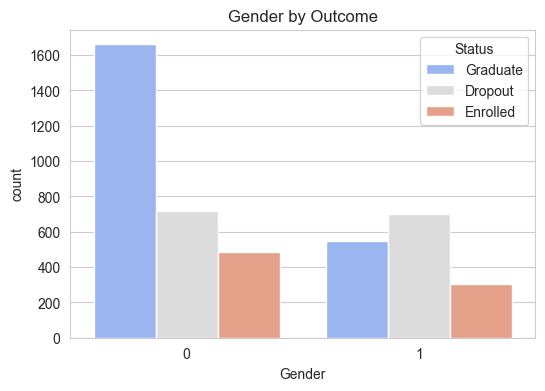

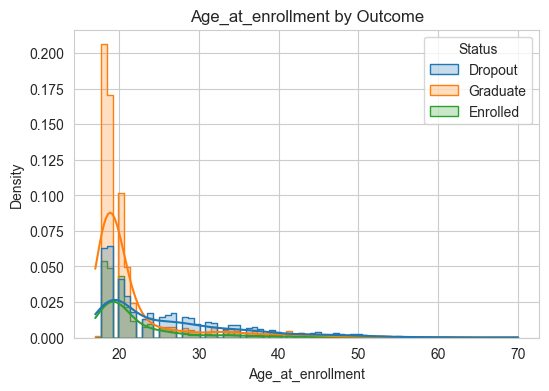

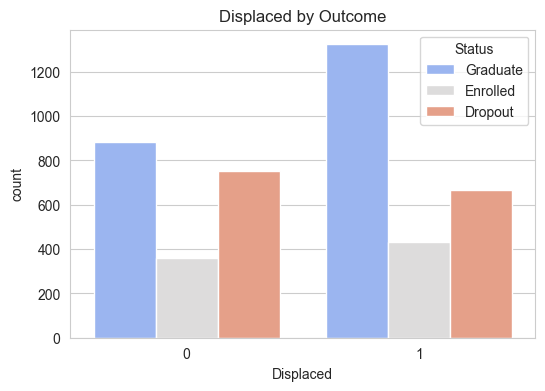

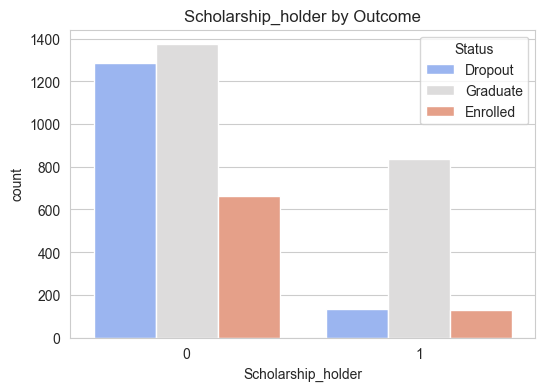

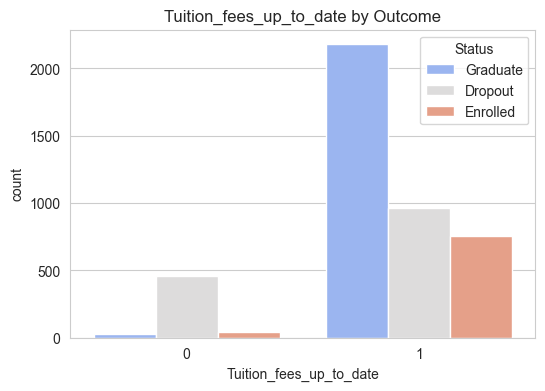

In [7]:
demo_cols = ["Gender", "Age_at_enrollment", "Displaced", "Scholarship_holder", "Tuition_fees_up_to_date"]
for col in demo_cols:
    plt.figure(figsize=(6,4))
    if df[col].dtype == "object" or len(df[col].unique()) < 10:
        sns.countplot(x=col, hue="Status", data=df, palette="coolwarm")
    else:
        sns.histplot(data=df, x=col, hue="Status", kde=True, element="step", stat="density")
    plt.title(f"{col} by Outcome")
    plt.show()

## 📚 Academic Performance Features

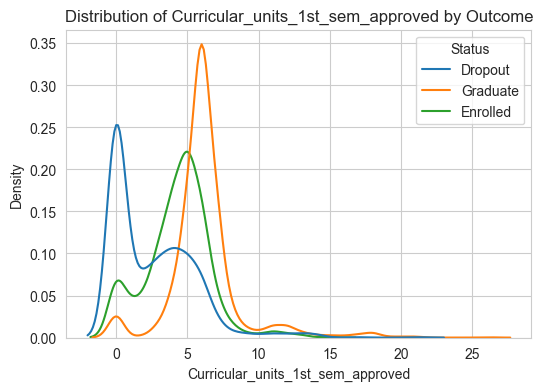

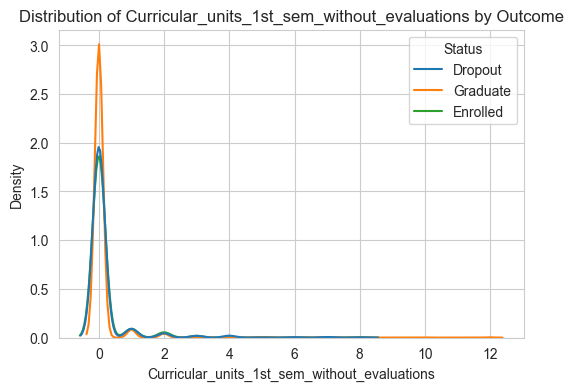

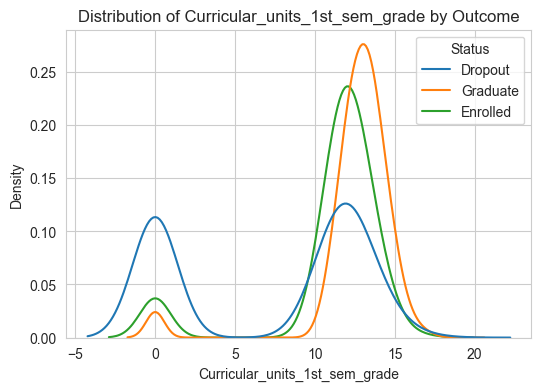

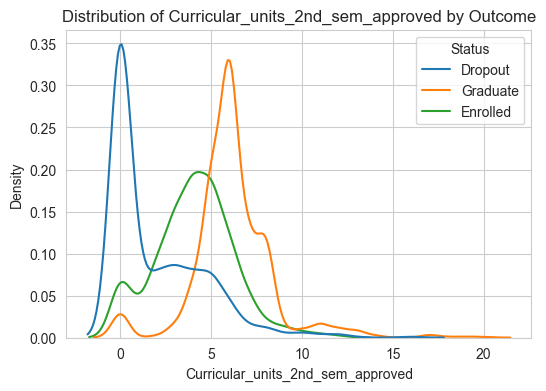

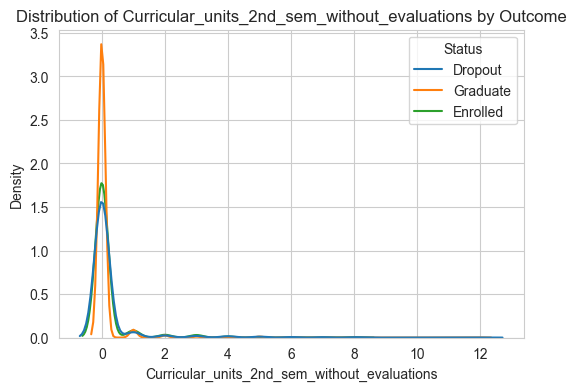

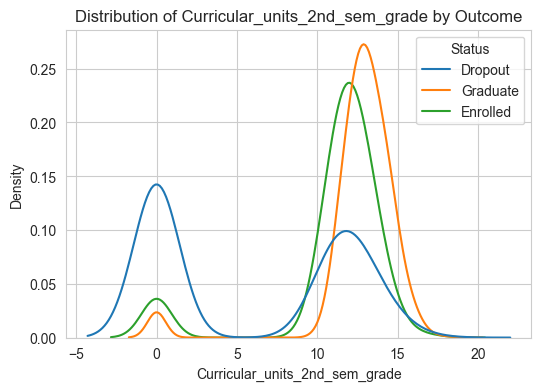

In [11]:
acad_cols = [
    "Curricular_units_1st_sem_approved", 
    "Curricular_units_1st_sem_without_evaluations", 
    "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_without_evaluations",
    "Curricular_units_2nd_sem_grade"
]
for col in acad_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue="Status", common_norm=False)
    plt.title(f"Distribution of {col} by Outcome")
    plt.show()

## 🔗 Correlation Analysis

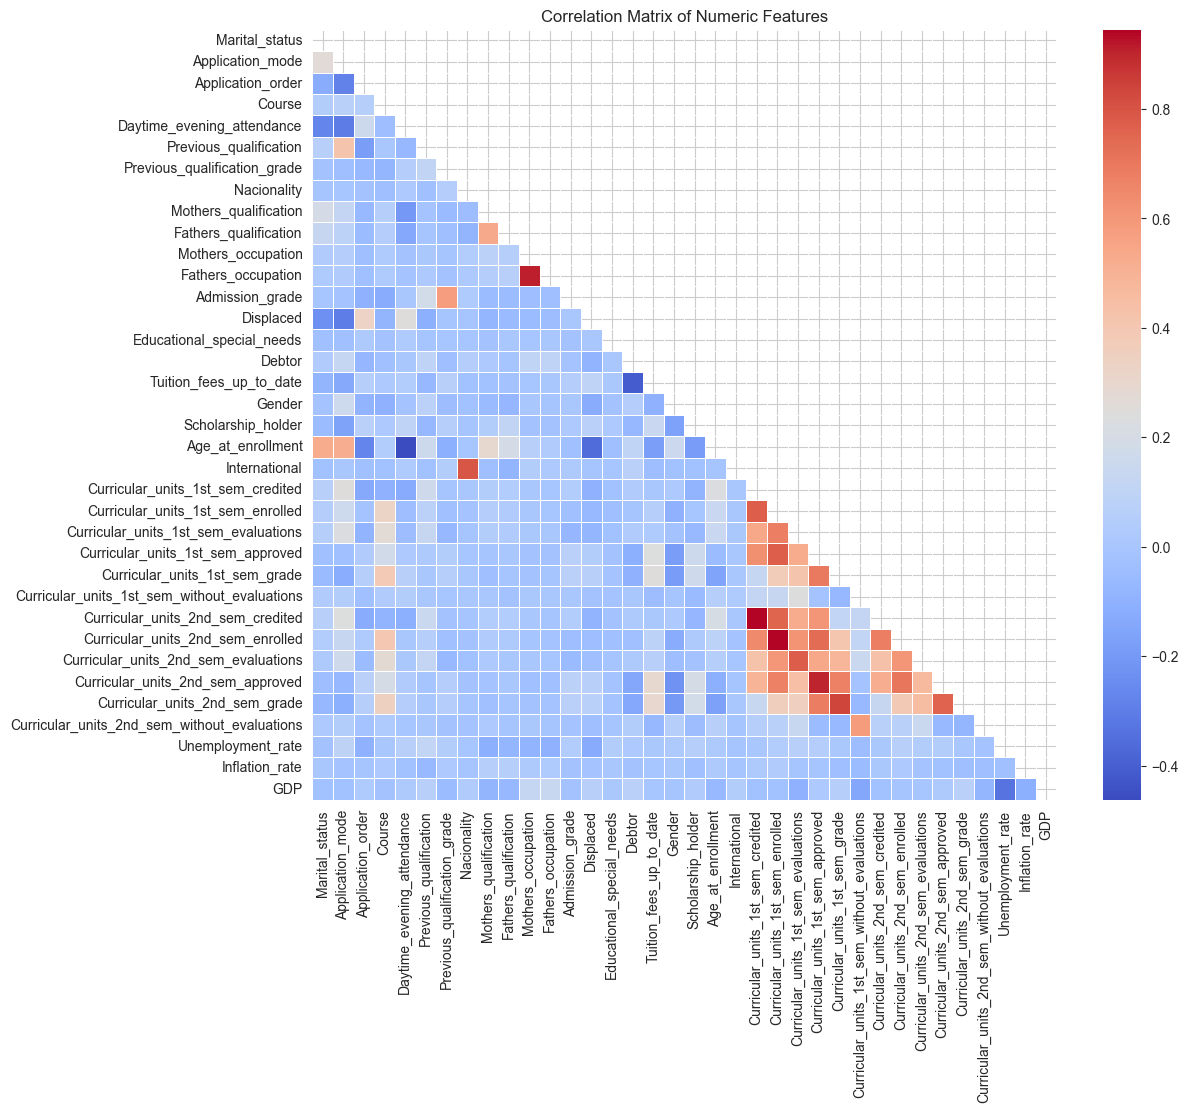

In [12]:
num_df = df.select_dtypes(include=["int64","float64"])
corr = num_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title("Correlation Matrix of Numeric Features")
plt.show()

## 💰 Socio-Economic Indicators

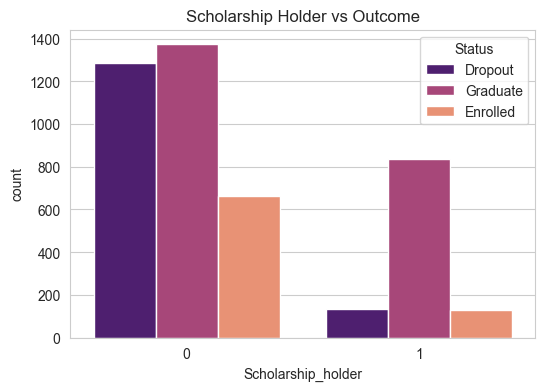

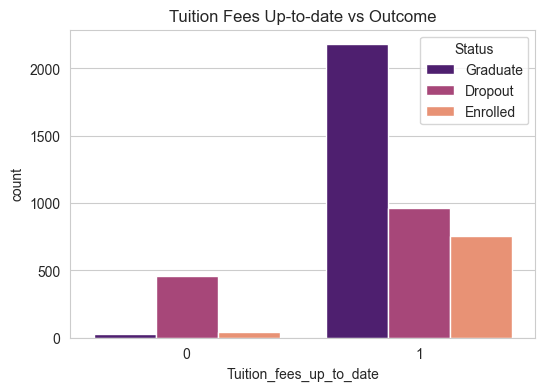

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="Scholarship_holder", hue="Status", data=df, palette="magma")
plt.title("Scholarship Holder vs Outcome")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Tuition_fees_up_to_date", hue="Status", data=df, palette="magma")
plt.title("Tuition Fees Up-to-date vs Outcome")
plt.show()

<Figure size 800x500 with 0 Axes>

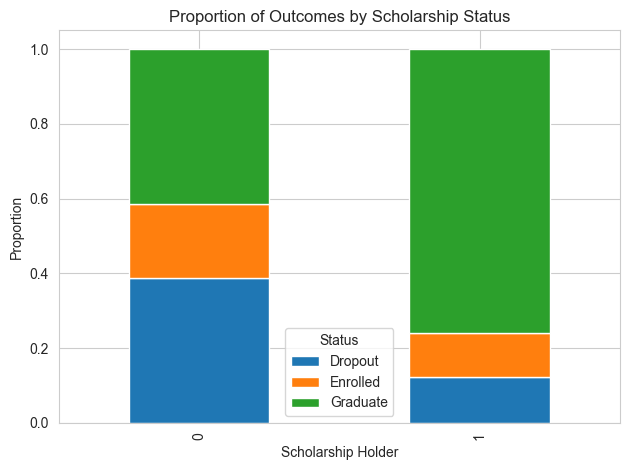

In [14]:
# Calculate proportions for each category
prop_df = df.groupby('Scholarship_holder')['Status'].value_counts(normalize=True).unstack()

# Plot proportions
plt.figure(figsize=(8,5))
prop_df.plot(kind='bar', stacked=True)
plt.title('Proportion of Outcomes by Scholarship Status')
plt.xlabel('Scholarship Holder')
plt.ylabel('Proportion')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

## 👥 Age and Gender Interactions

/var/folders/x5/bcc48lnd1z9byt_rz_vzszq00000gn/T/ipykernel_31954/2885006422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y="Age_at_enrollment", data=df, palette="pastel")


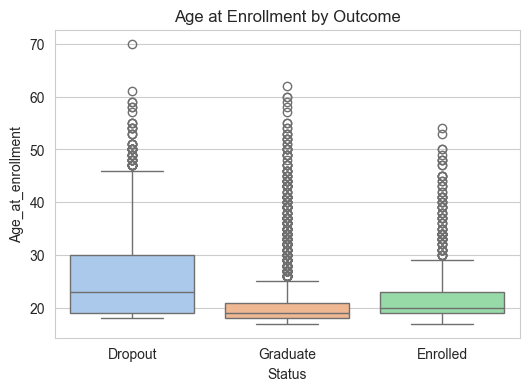

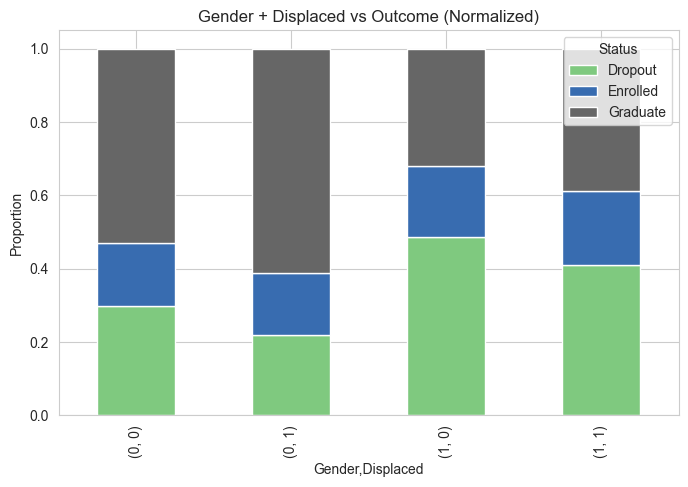

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Status", y="Age_at_enrollment", data=df, palette="pastel")
plt.title("Age at Enrollment by Outcome")
plt.show()

ct = pd.crosstab(index=[df["Gender"], df["Displaced"]], columns=df["Status"])
ct_norm = ct.div(ct.sum(axis=1), axis=0)
ct_norm.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Accent")
plt.title("Gender + Displaced vs Outcome (Normalized)")
plt.ylabel("Proportion")
plt.show()

## 🧾 Summary of Insights
- Outcome classes are imbalanced (dropout vs enrolled/graduate).
- Students with lower approved curricular units or more failed units appear more in the dropout category.
- Scholarship holders and those up-to-date on tuition tend to stay enrolled.
- Early academic performance (1st semester grades) is highly predictive.
- Gender, displacement, and age show nuanced patterns worth modeling later.